<a href="https://colab.research.google.com/github/NotMaj/Project-2-ML/blob/main/Project_2_Part_2_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

TASKS


-deleted unnecessary columns

-deleted duplicate rows

-identified and addressed missing values

-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

-produced univariate visuals for the target and all features

-identified outliers

-produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

In [66]:
filename ='/content/supermarket_sales - Sheet1.csv'
df = pd.read_csv(filename)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [67]:
#Drop uncessecary columns
df.drop(columns=['Date','Time','Invoice ID'], inplace=True)

In [68]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Payment                  1000 non-null   object 
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
dtypes: float64(7), int64(1), 

In [70]:
#Check for duplicates
df.duplicated().sum()

0

In [71]:
#Check if there are NaN values
df.isna().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [72]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [73]:
# Check categorical columns with function
def unique_values_in_categories(dataframe):
    unique_values_dict = {}
    categorical_columns = dataframe.select_dtypes(include=['object', 'category'])

    for column in categorical_columns:
        unique_values_dict[column] = dataframe[column].unique().tolist()

    return unique_values_dict


In [74]:
categories = unique_values_in_categories(df)
categories

{'Branch': ['A', 'C', 'B'],
 'City': ['Yangon', 'Naypyitaw', 'Mandalay'],
 'Customer type': ['Member', 'Normal'],
 'Gender': ['Female', 'Male'],
 'Product line': ['Health and beauty',
  'Electronic accessories',
  'Home and lifestyle',
  'Sports and travel',
  'Food and beverages',
  'Fashion accessories'],
 'Payment': ['Ewallet', 'Cash', 'Credit card']}

<Axes: xlabel='Branch', ylabel='count'>

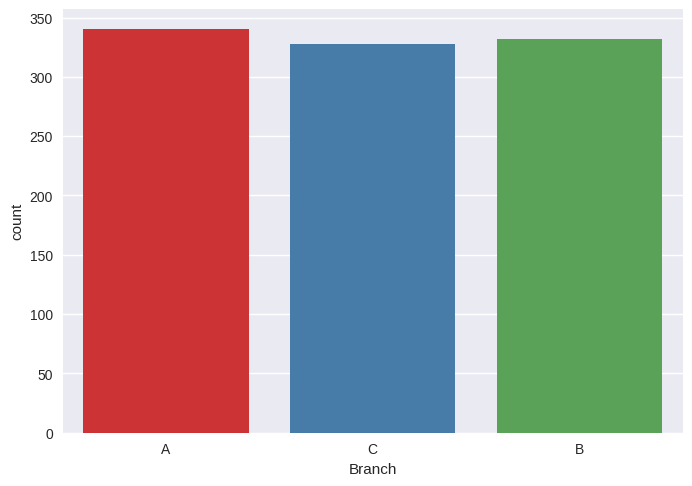

In [75]:
#Create univariate visuals for target and features

sns.countplot(data = df, x='Branch',palette="Set1")

<Axes: xlabel='City', ylabel='count'>

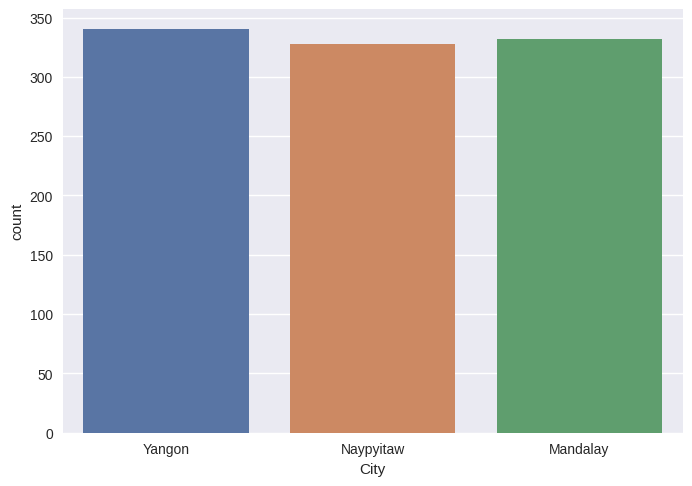

In [76]:
#City Count
sns.countplot(data = df, x='City',palette="deep")

<Axes: xlabel='Customer type', ylabel='count'>

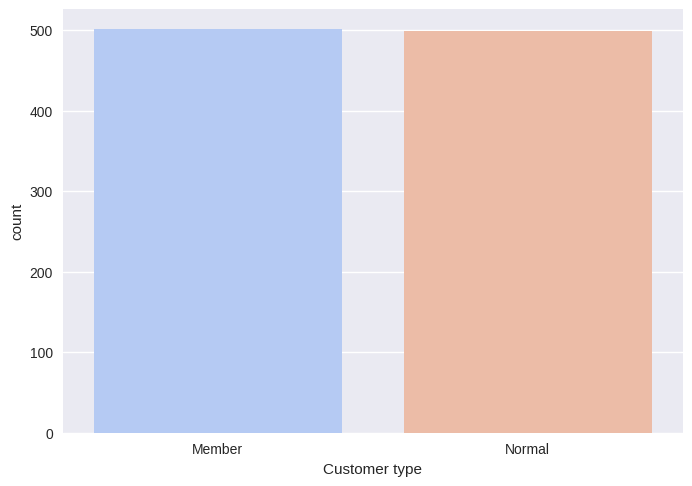

In [77]:
#Customer Type
sns.countplot(data = df, x='Customer type',palette='coolwarm')

<Axes: xlabel='Gender', ylabel='count'>

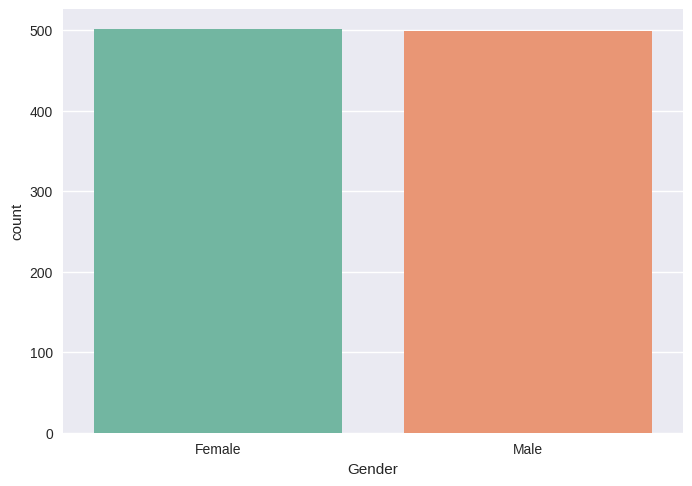

In [78]:
# Gender Countplot
sns.countplot(data = df, x='Gender', palette='Set2')

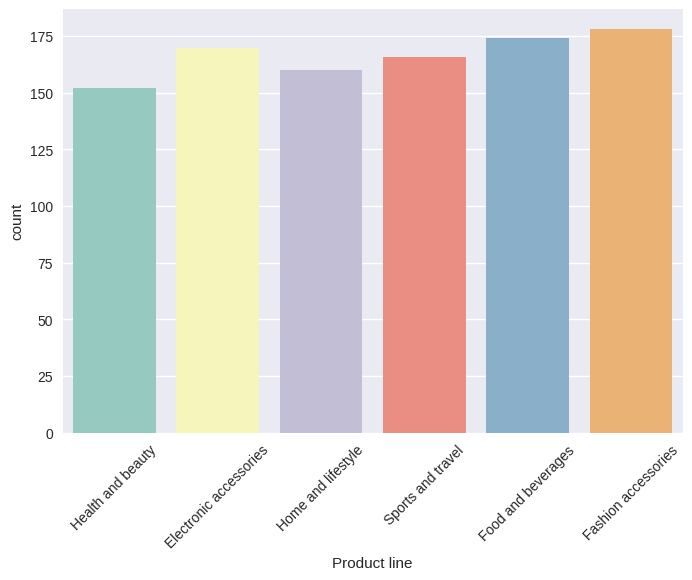

In [79]:
#Product line
sns.countplot(data = df, x='Product line',palette="Set3")
plt.xticks(rotation =45);

<Axes: xlabel='Payment', ylabel='count'>

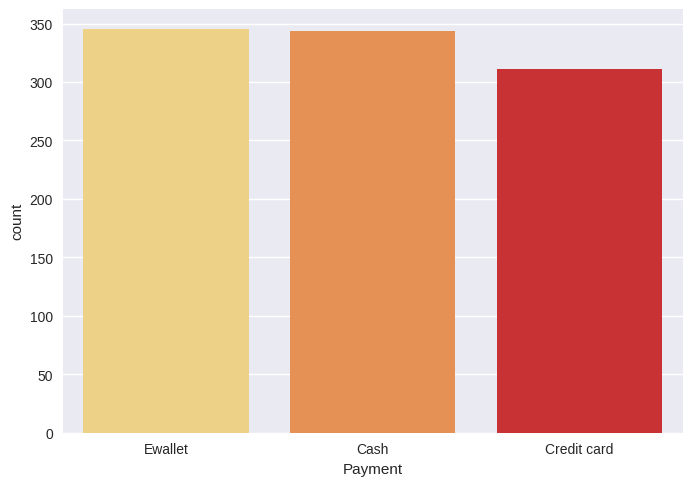

In [80]:
#Payment method
sns.countplot(data = df, x='Payment',palette="YlOrRd")

<ipython-input-81-f3f68257a1fc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


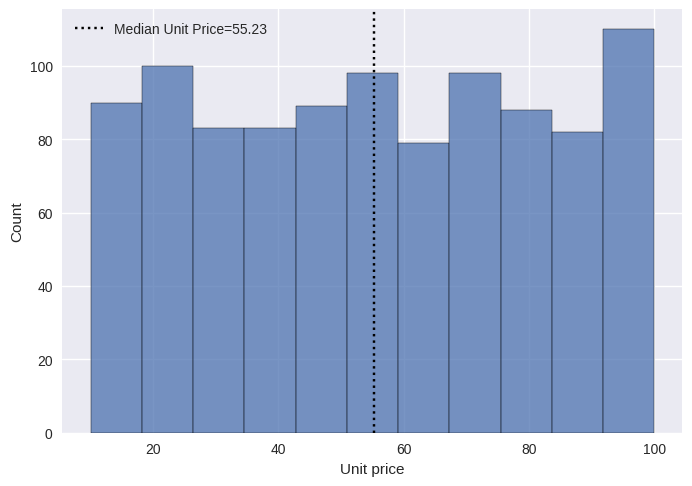

In [81]:
# Histogram for Unit Price
plt.style.use('seaborn')

ax = sns.histplot(df['Unit price'], bins='auto');

ax.set(xlabel='Unit price')


plt.axvline(df['Unit price'].median(),
            color="k",
            ls=":",
            label=f"Median Unit Price={round(df['Unit price'].median(),2)}");

plt.legend();

plt.show();

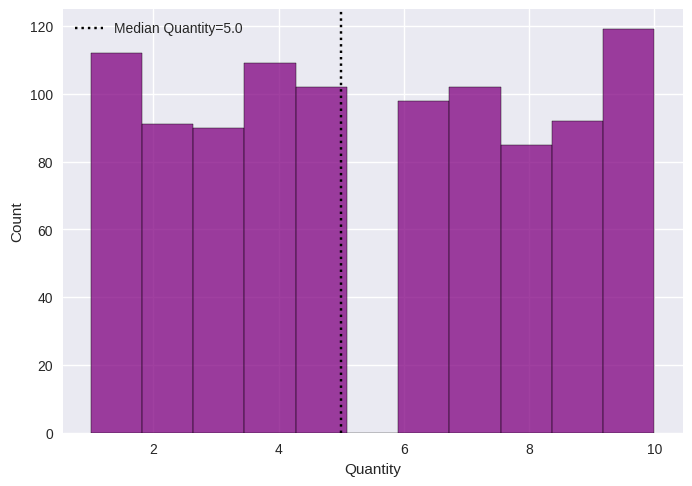

In [82]:
#Histogram for Quantity
sns.histplot(df['Quantity'], bins='auto', color ='purple');
plt.axvline(df['Quantity'].median(),
            color="k",
            ls=":",
            label=f"Median Quantity={round(df['Quantity'].median(),2)}");

plt.legend();

plt.show();

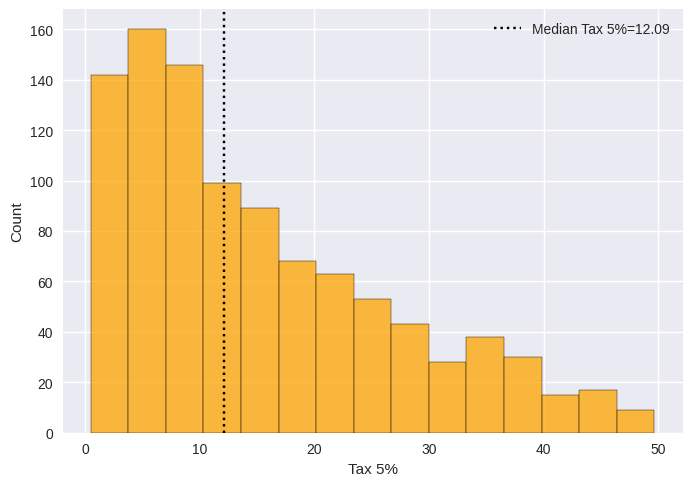

In [83]:
#Histogram for Tax 5%
sns.histplot(df['Tax 5%'], bins='auto', color ='orange');
plt.axvline(df['Tax 5%'].median(),
            color="k",
            ls=":",
            label=f"Median Tax 5%={round(df['Tax 5%'].median(),2)}");
plt.legend();

plt.show();

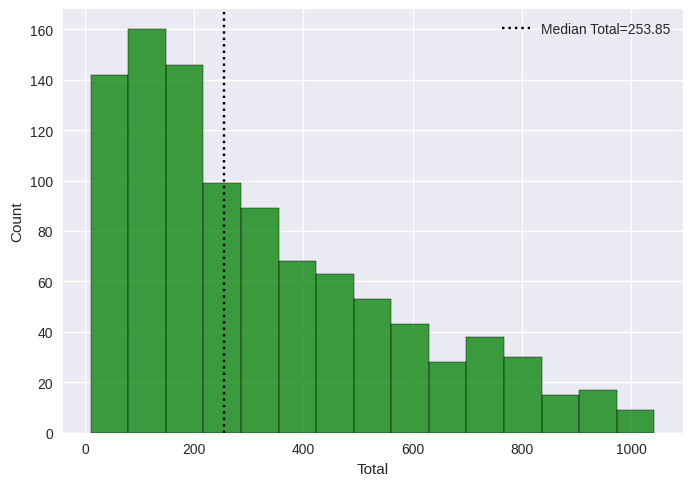

In [84]:
#Histogram for Total
sns.histplot(df['Total'], bins='auto', color ='green');
plt.axvline(df['Total'].median(),
            color="k",
            ls=":",
            label=f"Median Total={round(df['Total'].median(),2)}");
plt.legend();

plt.show();

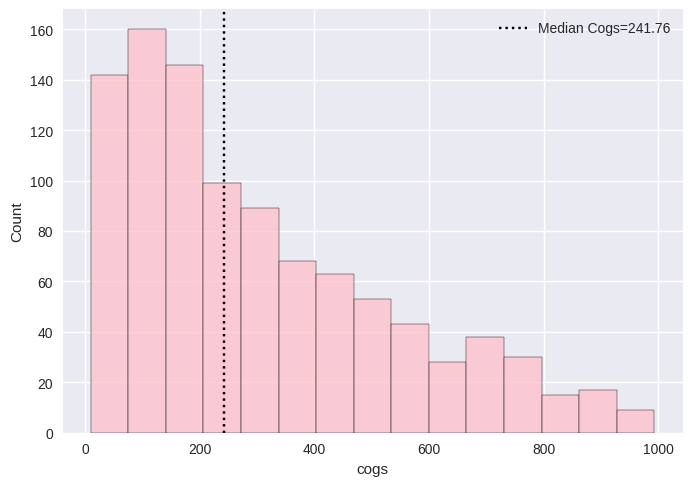

In [85]:
#Histogram for Cogs
sns.histplot(df['cogs'], bins='auto', color ='pink');
plt.axvline(df['cogs'].median(),
            color="k",
            ls=":",
            label=f"Median Cogs={round(df['cogs'].median(),2)}");
plt.legend();

plt.show();

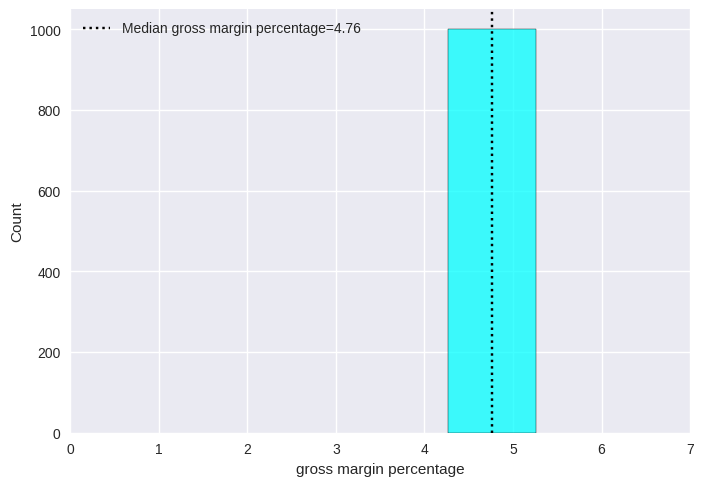

In [86]:
#Histogram for Gross Margin Percentage
sns.histplot(df['gross margin percentage'], bins='auto', color ='cyan');
plt.axvline(df['gross margin percentage'].median(),
            color="k",
            ls=":",
            label=f"Median gross margin percentage={round(df['gross margin percentage'].median(),2)}");
plt.xlim(0,7)

plt.legend();

plt.show();

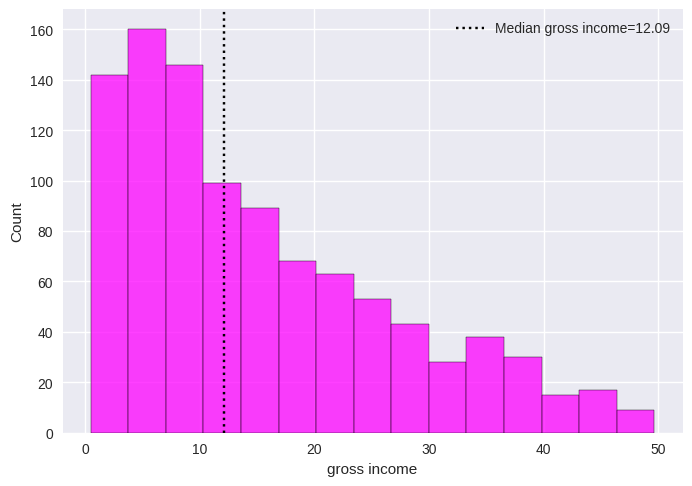

In [87]:
#Histogram for Gross Income
sns.histplot(df['gross income'], bins='auto', color ='magenta');
plt.axvline(df['gross income'].median(),
            color="k",
            ls=":",
            label=f"Median gross income={round(df['gross income'].median(),2)}");


plt.legend();

plt.show();

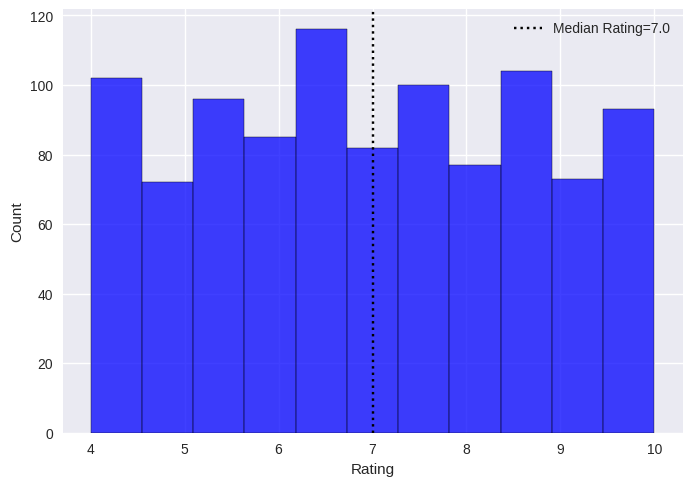

In [88]:
#Histogram for Rating
sns.histplot(df['Rating'], bins='auto', color ='blue');
plt.axvline(df['Rating'].median(),
            color="k",
            ls=":",
            label=f"Median Rating={round(df['Rating'].median(),2)}");


plt.legend();

plt.show();

<ipython-input-89-591da1a8c7c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =df.corr()


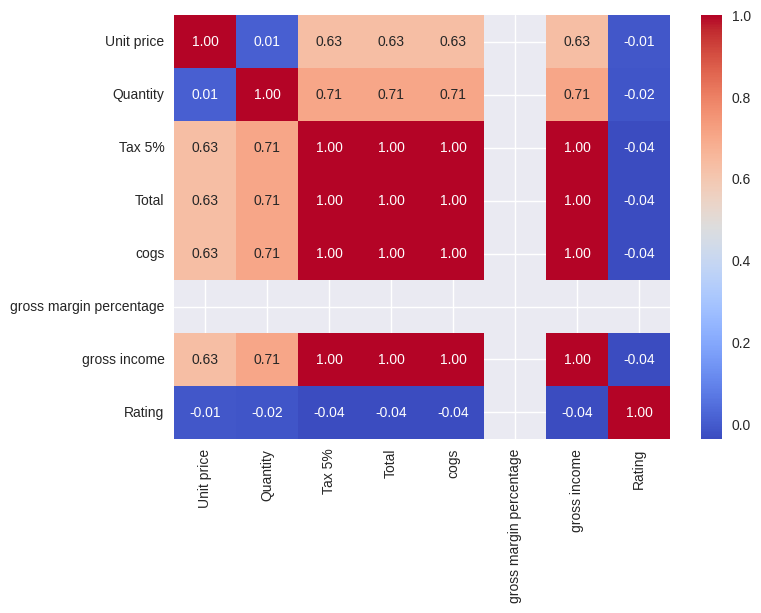

In [89]:
# Heatmap
corr =df.corr()
sns.heatmap(corr,cmap='coolwarm', annot=True, fmt ='.2f');

There are multiple correlations present as show in the heatmap, with correlations from moderate to strong. Namely, Unit Price with the following other features of Tax 5%, Total, cogs, gross income with 63% correlation. Another is Quantity with gross income, cogs, Total and Tax 5% with 71% correlation.



In [90]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


In [91]:
#change the rating in whole values
df['Rating'] = df['Rating'].round(0)

In [92]:
df['Rating'].value_counts()

6.0     193
8.0     179
7.0     159
9.0     141
5.0     133
4.0     102
10.0     93
Name: Rating, dtype: int64

In [93]:
# pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline


#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# load library
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report

In [94]:
def evaluate_classification(y_true, y_predicted, average=None):
  accuracy = accuracy_score(y_true, y_predicted)
  recall = recall_score(y_true, y_predicted, average=average)
  precision = precision_score(y_true, y_predicted, average=average)
  f1 = f1_score(y_true, y_predicted, average=average)

  print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}')


In [95]:
# Split the data into training and validation sets
X = df.drop(columns='Rating')
y = df['Rating']


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [97]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [98]:
#Making tuple for columns
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

In [99]:
preprocessed = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')


In [100]:
# Instantatiate the scaler, ohe and models
knn = KNeighborsClassifier()


In [101]:
knn_pipe =make_pipeline(preprocessed, knn)

In [102]:
knn_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7be518b4f1c0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7be509a9e560>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [103]:
# Save predictions for both the training and testing data
train_preds = knn_pipe.predict(X_train)
test_preds = knn_pipe.predict(X_test)

In [104]:
# Training metrics
print('Training Metrics')
evaluate_classification(y_train, train_preds, average = 'macro')

print('\n')

# Testing matrics
print('Testing Metrics')
evaluate_classification(y_test, test_preds, average = 'macro')


Training Metrics
Accuracy: 0.38666666666666666 
Recall: 0.3737650272520736 
Precision: 0.38459014344411413 
F1 Score: 0.36614805962468466


Testing Metrics
Accuracy: 0.136 
Recall: 0.135976850961323 
Precision: 0.1196297876604782 
F1 Score: 0.1216347446908637


In [105]:
#Hypertune
knn_pipe.get_params()


{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7be518b4f1c0>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7be509a9e560>)])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7be518b4f1c0>),
                                 ('onehotencoder',
              

In [106]:
params = {'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
          'kneighborsclassifier__n_neighbors':[3, 10] }

In [107]:
knn_pipe =make_pipeline(preprocessed, knn)

In [108]:
# instantiate the grid
knn_grid = GridSearchCV(estimator = knn_pipe, param_grid = params,
                        scoring = 'accuracy', cv = 5, verbose = 1, n_jobs = -1)


In [109]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7be518b4f1c0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7be509a9e560>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__algorithm': ['auto',
                                                             'ball_tree',
                                                             'kd_tree',
                                                             'brute'],
                         'kneighborsclassifier__n_neighbors': [3, 10]},
             scoring='accuracy', verbose=1)

In [110]:
# get the best params
knn_grid.best_params_


{'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__n_neighbors': 10}

In [111]:
# save the params
knn_cv = knn_grid.best_estimator_

In [112]:
# fit the model using best params
knn_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7be509a9e2f0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7be509a9fdf0>)])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=10))])

In [113]:
# run classification report on both train and test dataset for the tuned model
knn_cv_train_pred = knn_cv.predict(X_train)
knn_cv_test_pred = knn_cv.predict(X_test)


In [114]:
# Training metrics
print('Training Metrics')
evaluate_classification(y_train, knn_cv_train_pred, average = 'macro')

print('\n')

# Testing matrics
print('Testing Metrics')
evaluate_classification(y_test, knn_cv_test_pred, average = 'macro')

Training Metrics
Accuracy: 0.308 
Recall: 0.2932066402451006 
Precision: 0.3332205143263635 
F1 Score: 0.2964179505476304


Testing Metrics
Accuracy: 0.124 
Recall: 0.11592256949399807 
Precision: 0.10558943344984535 
F1 Score: 0.1093693906099226


In [115]:
dtc = DecisionTreeClassifier()

In [116]:
#DTC MODEL
dtc_pipe =make_pipeline(preprocessed, dtc)

In [117]:
dtc_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7be518b4f1c0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7be509a9e560>)])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [118]:
# Save predictions for both the training and testing data
train_preds = dtc_pipe.predict(X_train)
test_preds = dtc_pipe.predict(X_test)

In [119]:
# Training metrics
print('Training Metrics')
evaluate_classification(y_train, train_preds, average = 'macro')

print('\n')

# Testing matrics
print('Testing Metrics')
evaluate_classification(y_test, test_preds, average = 'macro')


Training Metrics
Accuracy: 1.0 
Recall: 1.0 
Precision: 1.0 
F1 Score: 1.0


Testing Metrics
Accuracy: 0.172 
Recall: 0.16120076438399417 
Precision: 0.16263740667267013 
F1 Score: 0.1616975047127596


In [120]:
#Hypertune
dtc_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7be518b4f1c0>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7be509a9e560>)])),
  ('decisiontreeclassifier', DecisionTreeClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7be518b4f1c0>),
                                 ('onehotencoder',
          

In [121]:
params = {'decisiontreeclassifier__max_depth':[3,5],
          'decisiontreeclassifier__max_leaf_nodes':[10,100],}

In [122]:
dtc_pipe =make_pipeline(preprocessed, dtc)

In [123]:
# instantiate the grid
dtc_grid = GridSearchCV(estimator = dtc_pipe, param_grid = params,
                        scoring = 'accuracy', cv = 5, verbose = 1, n_jobs = -1)

In [124]:
dtc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7be518b4f1c0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7be509a9e560>)])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': [3, 5],
                         'decisiontreeclassifier__max_leaf_nodes': [10, 100]},
             scoring='accuracy', verbose=1)

In [125]:
# get the best params
dtc_grid.best_params_

{'decisiontreeclassifier__max_depth': 3,
 'decisiontreeclassifier__max_leaf_nodes': 10}

In [126]:
# save the params
dtc_cv = dtc_grid.best_estimator_

In [127]:
# fit the model using best params
dtc_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7be509add4e0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7be509adc610>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10))])

In [128]:
# run classification report on both train and test dataset for the tuned model
dtc_cv_train_pred = dtc_cv.predict(X_train)
dtc_cv_test_pred = dtc_cv.predict(X_test)


In [129]:
# Training metrics
print('Training Metrics')
evaluate_classification(y_train, dtc_cv_train_pred, average = 'macro')

print('\n')

# Testing matrics
print('Testing Metrics')
evaluate_classification(y_test, dtc_cv_test_pred, average = 'macro')

Training Metrics
Accuracy: 0.21733333333333332 
Recall: 0.16843338196670438 
Precision: 0.44427622938858896 
F1 Score: 0.09662841167956518


Testing Metrics
Accuracy: 0.18 
Recall: 0.13412698412698412 
Precision: 0.042735042735042736 
F1 Score: 0.04987053923224135


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
bc = BaggingClassifier()

In [131]:
#bc MODEL
bc_pipe =make_pipeline(preprocessed, bc)

In [132]:
bc_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7be518b4f1c0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7be509a9e560>)])),
                ('baggingclassifier', BaggingClassifier())])

In [133]:
# Save predictions for both the training and testing data
train_preds = bc_pipe.predict(X_train)
test_preds = bc_pipe.predict(X_test)

In [134]:
# Training metrics
print('Training Metrics')
evaluate_classification(y_train, train_preds, average = 'macro')

print('\n')

# Testing matrics
print('Testing Metrics')
evaluate_classification(y_test, test_preds, average = 'macro')


Training Metrics
Accuracy: 0.9853333333333333 
Recall: 0.9868036110136125 
Precision: 0.9849087478806398 
F1 Score: 0.9857577616971439


Testing Metrics
Accuracy: 0.152 
Recall: 0.14035567606996177 
Precision: 0.13371182904078788 
F1 Score: 0.13598130713683682
